# Visualizing and Analysisng Dataset on Chronic (Kidney) Disease.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Dropping ID column

In [7]:
df.drop('id', axis=1, inplace=True)

In [8]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'rbc', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'wbc_count', 'rbc_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia', 'class']

In [10]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'rbc',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'wbc_count', 'rbc_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

In [11]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


The dataset has 400 rows but count for each columns are less than 400 which represent the presence of null value 

In [15]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
rbc                         object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
wbc_count                   object
rbc_count                   object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
anemia                      object
class                       object
dtype: object

In [16]:
df['packed_cell_volume']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

Packed cell volume column must be of float data type but it is showing object datatype due to presence of /t?

In [17]:
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

Due to some str value in the column, it makes it object column.

In [18]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors= 'coerce')  # suppress the error / ignore the error

In [19]:
df['packed_cell_volume']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

All string character converted to nan

In [20]:
df['packed_cell_volume'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [21]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'rbc',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'wbc_count', 'rbc_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

In [22]:
df['wbc_count'] = pd.to_numeric(df['wbc_count'], errors= 'coerce')  # suppress the error / ignore the error

In [23]:
df['wbc_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: wbc_count, Length: 400, dtype: float64

In [24]:
df['rbc_count'] = pd.to_numeric(df['rbc_count'], errors= 'coerce')  # suppress the error / ignore the error

In [25]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
rbc                         object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
wbc_count                  float64
rbc_count                  float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
anemia                      object
class                       object
dtype: object

Seperating categorical & numerical column.

In [27]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['rbc',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anemia',
 'class']

In [28]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'wbc_count',
 'rbc_count']

In [29]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [30]:
df['diabetes_mellitus'].replace(to_replace= {' yes' : 'yes', '\tyes': 'yes', '\tno' : 'no'}, inplace= True)

In [31]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [34]:
df['coronary_artery_disease'].replace(to_replace= '\tno', value= 'no', inplace= True)

In [35]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [37]:
df['class'] = df['class'].map({'ckd' :1 , 'notckd' : 0, 'ckd\t': 1 })

In [38]:
df['class'].unique()

array([1, 0])

# Univariate Analysis 

One feature at a Time

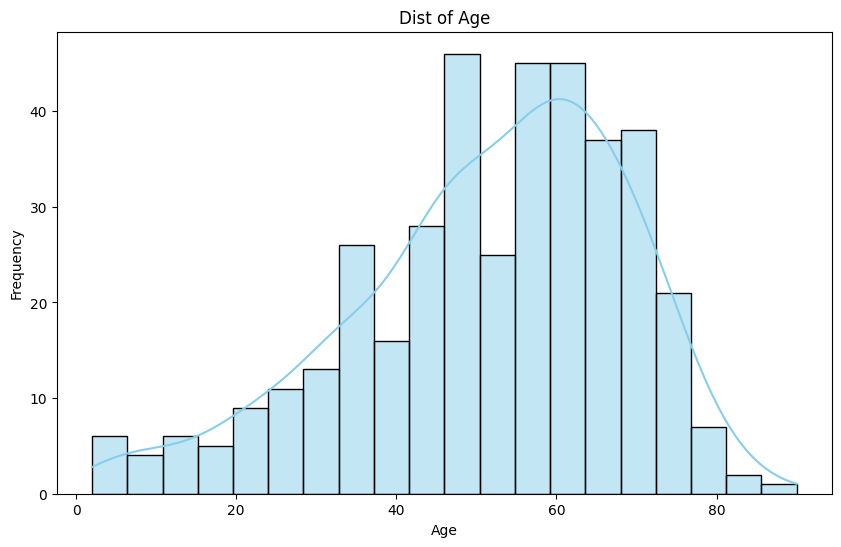

In [39]:
plt.figure(figsize= (10, 6))
sns.histplot(df['age'].dropna(), kde= True, bins= 20, color= 'skyblue')
plt.title('Dist of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

> Insights : Age is left skewed data.

In [40]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'rbc',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'wbc_count', 'rbc_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='count'>

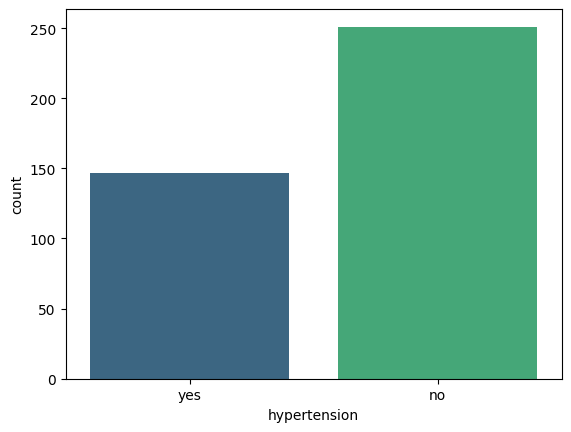

In [42]:
sns.countplot(x= 'hypertension', data= df, palette= 'viridis')

> Insights : 150 of them have hypertension

---



<Axes: xlabel='class', ylabel='blood_urea'>

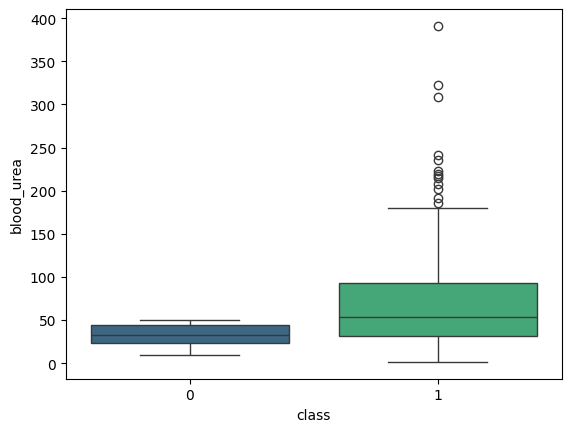

In [44]:
sns.boxplot(x= 'class', y= 'blood_urea', data= df, palette= 'viridis')

> Insights : People with kidney disease has higher blood urea with outliers.

<Axes: xlabel='class', ylabel='serum_creatinine'>

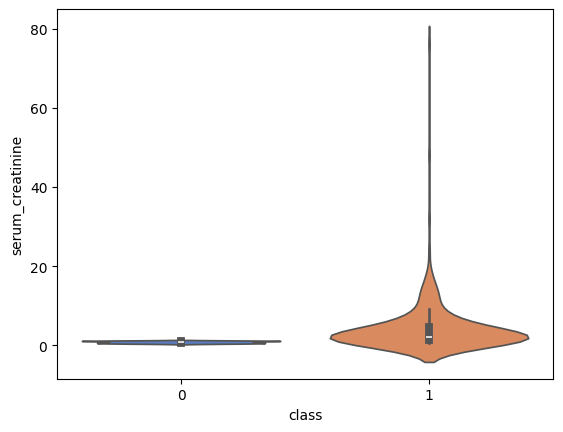

In [45]:
sns.violinplot(x='class', y= 'serum_creatinine', data= df, palette= 'muted')

---

<Axes: xlabel='anemia', ylabel='count'>

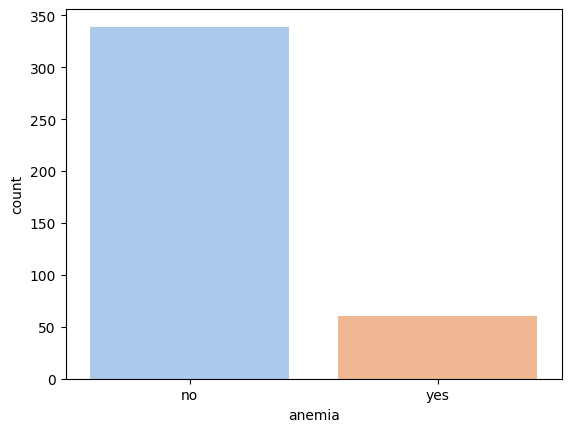

In [46]:
sns.countplot(x='anemia', data=df, palette='pastel')

> Insights : Majority of people not suffering from anemia.

In [47]:
df.appetite.value_counts()

appetite
good    317
poor     82
Name: count, dtype: int64

<Axes: ylabel='count'>

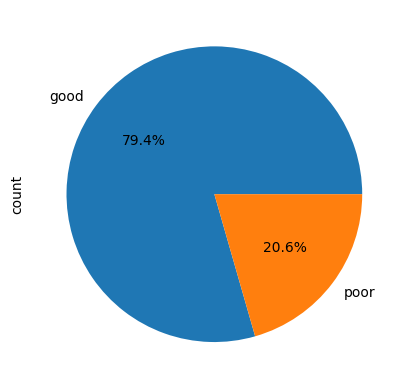

In [48]:
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='count'>

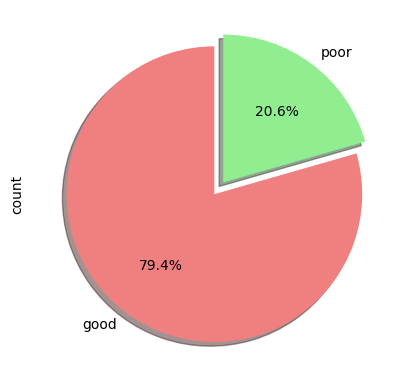

In [52]:
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], explode= (0, 0.1), shadow= True, startangle = 90)

> Insights : 79.4% people have good appetite and rest have poor.

In [53]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'rbc',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'wbc_count', 'rbc_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')